In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import pandas as pd
from data_parser import *
plt.rcParams['figure.figsize'] = [6, 2]

# Get ground truth throughput from the data file, and visualize it

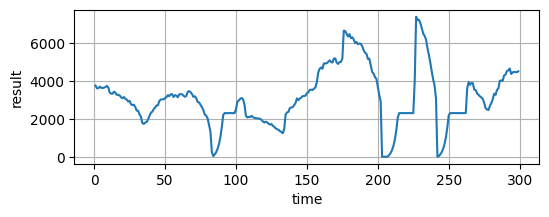

In [2]:
datafile = Datafile("training_data/trace1.json")

input_data = datafile.read()

throughput = input_data.get("throughput", value_type="number")

plot_timeline(throughput)

# Get carrier bandwidth from datafile, and save it to a pandas dataframe

In [3]:
datafile = Datafile("training_data/trace1.json")
input_data = datafile.read()

bandwidth = input_data.get("carrier_bandwidth", value_type="number")

timeline_to_dataframe(bandwidth)

,start,end,value
0,1.0,1.0,4000.000000
1,2.0,2.0,4000.000000
2,3.0,3.0,4000.000000
3,4.0,4.0,4000.000000
4,5.0,5.0,4000.000000
...,...,...,...
294,295.0,295.0,4952.440866
295,296.0,296.0,4952.440866
296,297.0,297.0,4952.440866
297,298.0,298.0,4952.440866


# Just use carrier bandwidth to predict the throughput

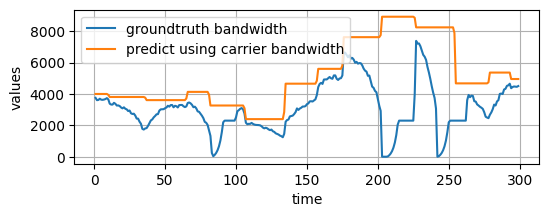

rmse is:  2994.710059390585


In [4]:
datafile = Datafile("training_data/trace1.json")
input_data = datafile.read()

bandwidth = input_data.get("carrier_bandwidth", value_type="number")
throughput = input_data.get("throughput", value_type="number")

plot_multiple_timeline([throughput, bandwidth], ["groundtruth bandwidth", "predict using carrier bandwidth"])

rmse = calculate_rmse(bandwidth, throughput)
print("rmse is: ", rmse)

# Get the signal strength records and try to average it

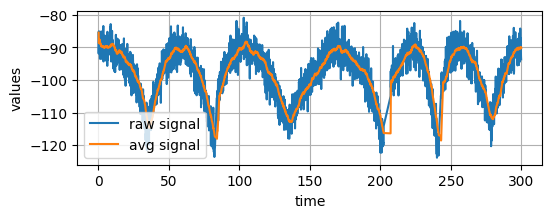

In [6]:
datafile = Datafile("training_data/trace1.json")
input_data = datafile.read()

signal_strength = input_data.get("signal_strength", value_type="number")


avg_signal = signal_strength.averageWithin(3)

plot_multiple_timeline([signal_strength, avg_signal], ["raw signal", "avg signal"])

